# Homework 1 - Coding 
## Prawesh Dahal (pd2579)

### Machine Learning - Ridge Regression
Problem 3 (1)

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
Xtrain = pd.read_csv('X_train.csv').values ## 349 rows, 7 columns - 6 features, first row of 1
Ytrain = pd.read_csv('y_train.csv').values ## 349 rows, 1 column
Xtest = pd.read_csv('X_test.csv').values ## 41 rows, 7 cols
Ytest = pd.read_csv('y_test.csv').values #41 rows


In [40]:
lambda_vals = range(5001)
WRR =  []
 

Solving for $ W_{RR} = (\lambda I + X^{T}X)^{-1} X^{T}y $   for all values of $\lambda$

In [41]:
#Solving WRR for all values of lambda
for L in lambda_vals:
    #print(L)
    lamI = L * np.identity(Xtrain.shape[1])
    XTX = np.matmul(Xtrain.transpose(),Xtrain)
    lamI_XTX_inv = np.linalg.inv(lamI + XTX)
    XTy = np.matmul(Xtrain.transpose(),Ytrain)
    W = np.matmul(lamI_XTX_inv,XTy)
    WRR.append(W.tolist())


To calculate $df(\lambda)$ using SVD, we need to calculate $trace[M]$ which is $M = (\lambda S^{-2} + I)^{-1}$

In [42]:
#Creating df(lambda) using SVD function
u, s, vh = np.linalg.svd(Xtrain)
Sv = np.diag(s)
Sv_inv = np.linalg.inv(Sv)
Sv_inv_sq = np.matmul(Sv_inv,Sv_inv)

dfL = np.zeros((5001,1));
for L in lambda_vals: 
    M = np.linalg.inv(L*Sv_inv_sq + np.identity(Sv_inv_sq.shape[0]))
    dfL[L] = (np.trace(M))
    

Plotting

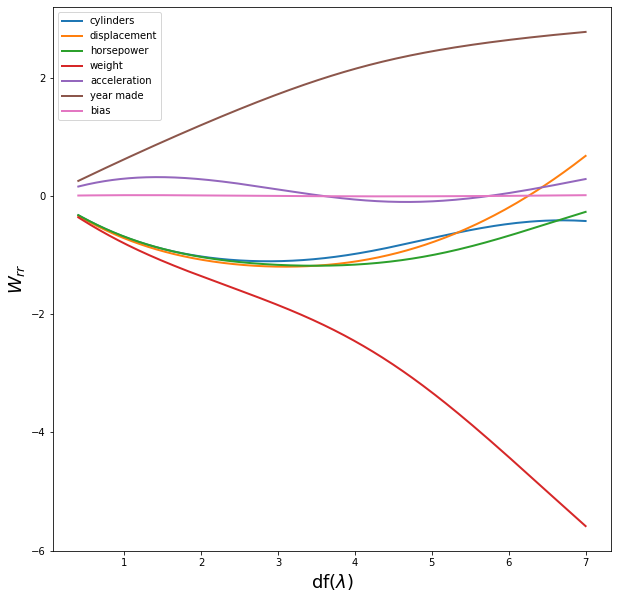

In [43]:
wdata = pd.DataFrame(WRR)

wdata.columns = ["cylinders","displacement","horsepower","weight","acceleration","year made","bias"]

plt.figure(figsize=(10,10))
for i in wdata.columns:
    plt.plot(dfL,list(wdata[i]), linewidth =2)
        
plt.xlabel("df($\lambda$)", fontsize = 18)    
plt.ylabel("$W_{rr}$", fontsize = 18)
plt.legend(wdata.columns)
plt.show()

### Prediction on test data

In [44]:
lambda_test = range(51)
RMSE = []

for L_t in lambda_test:
    lamI = L_t * np.identity(Xtrain.shape[1])
    XTX = np.matmul(Xtrain.transpose(),Xtrain)
    lamI_XTX_inv = np.linalg.inv(lamI + XTX)
    XTy = np.matmul(Xtrain.transpose(),Ytrain)
    W = np.matmul(lamI_XTX_inv,XTy)
    y_pred = np.matmul(Xtest,W)
    error = np.sqrt(np.mean(np.square(Ytest - y_pred)))
    RMSE.append(error)



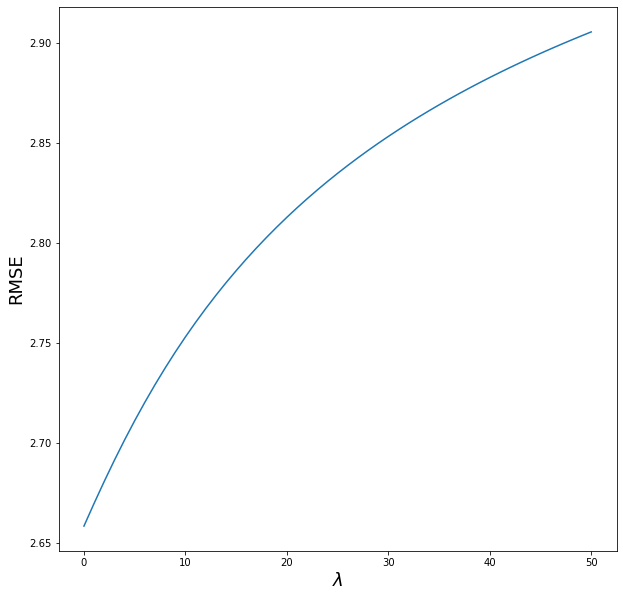

In [45]:
plt.figure(figsize=(10,10))
plt.plot(lambda_test,RMSE)
plt.xlabel("$\lambda$", fontsize = 18)    
plt.ylabel("RMSE", fontsize = 18)
plt.show()

#### Learn a p-th order polynomial regression model for $p = 1, 2, 3.$

Add additional dimension to the train and the test data. 

Original X with 6 features -  $(1, x_{1}, x_{2}, x_{3}, x_{4}, x_{5}, x_{6})$ \
New X with 18 features - $(1, x_{1}, ..., x_{5}, x_{6},  x_{1}^2, x_{2}^2, ... x_{6}^2, x_{1}^3, x_{2}^3 , ... ,  x_{6}^3)$
                                

In [46]:
lambda_P = range(101)
P_RMSE = pd.DataFrame()
for p in range(1,4):

    Xtrain_P = Xtrain
    Xtest_P = Xtest

    print(p)
    if(p>1):
        for i in range(2,p+1):
            for j in range(6):
                mu = np.mean(Xtrain[:,j]**i)
                std = np.std(Xtrain[:,j]**i)
                Xtmp_train = (Xtrain[:,j]**i - mu)/std
                Xtmp_test = (Xtest[:,j]**i - mu)/std ##standarize testing with training stats as well
                Xtrain_P = np.append(Xtrain_P, Xtmp_train.reshape((Xtmp_train.shape[0],1)), axis=1)
                Xtest_P = np.append(Xtest_P, Xtmp_test.reshape((Xtmp_test.shape[0],1)), axis=1)

    RMSE = []

    for L_t in lambda_P:
        lamI = L_t * np.identity(Xtrain_P.shape[1])
        XTX = np.matmul(Xtrain_P.transpose(),Xtrain_P)
        lamI_XTX_inv = np.linalg.inv(lamI + XTX)
        XTy = np.matmul(Xtrain_P.transpose(),Ytrain)
        W = np.matmul(lamI_XTX_inv,XTy)
        y_pred = np.matmul(Xtest_P,W)
        error = np.sqrt(np.mean(np.square(Ytest - y_pred)))
        RMSE.append(error)

    P_RMSE[p] = RMSE


1
2
3


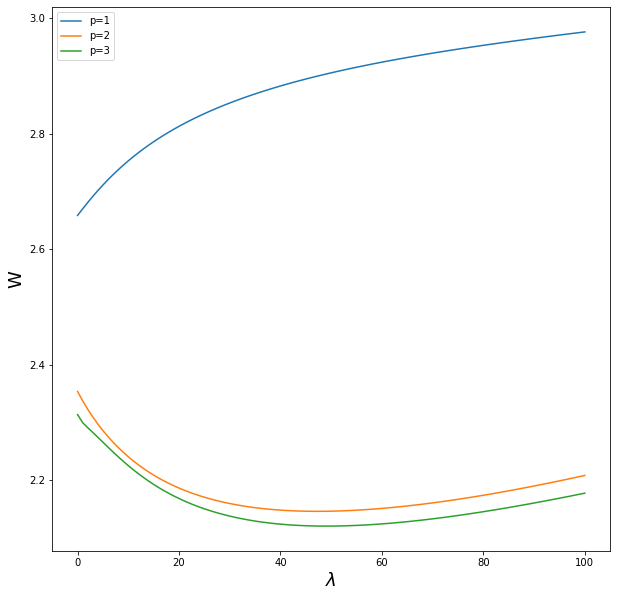

In [47]:
plt.figure(figsize=(10,10))
for i in P_RMSE.columns:
    plt.plot(lambda_P,P_RMSE[i])

plt.xlabel("$\lambda$", fontsize = 18)    
plt.ylabel("W", fontsize = 18)
plt.legend(["p=1","p=2","p=3"])
plt.show()